In [ ]:
!nvidia-smi

Sat Nov 18 09:21:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install split-folders

In [ ]:
import os
import splitfolders


In [ ]:
input_path = '/content/drive/MyDrive/CSE413-LAB Project/split'
output_path = '/content/drive/MyDrive/CSE413-LAB Project/output'



# **Visualization** and also Load of Data

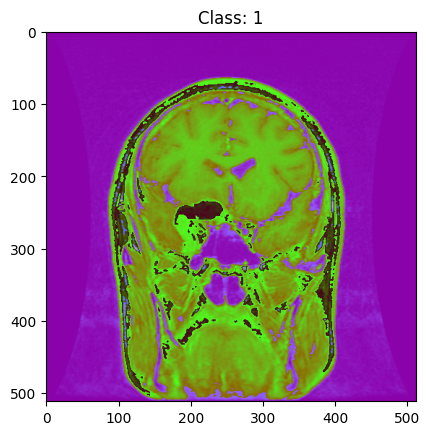

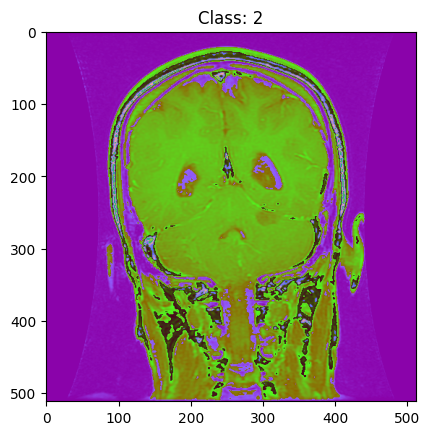

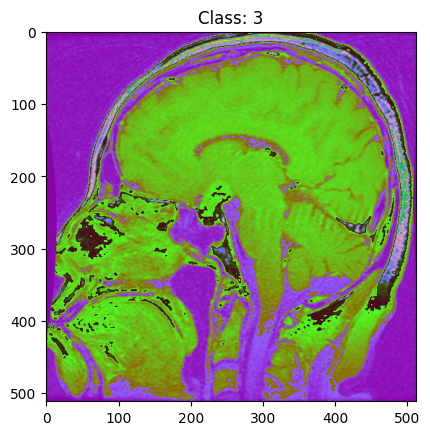

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define the paths for the training set
train_path = '/content/drive/MyDrive/CSE413-LAB Project/output/train'

# Create the ImageFolder for training set
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)

# Get unique classes from the training set
unique_classes = set(train_dataset.targets)

# Create a DataLoader for training set
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

# Display one image from each class in the training set
for class_label in unique_classes:
    # Find an image with the specified class label
    for images, labels in train_loader:
        if labels.item() == class_label:
            img = transforms.ToPILImage()(images[0])  # Convert tensor to PIL Image
            plt.imshow(img)
            plt.title(f"Class: {train_dataset.classes[class_label]}")
            plt.show()
            break  # Break after displaying one image for the current class

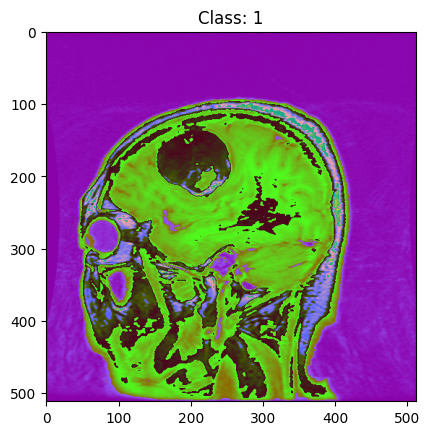

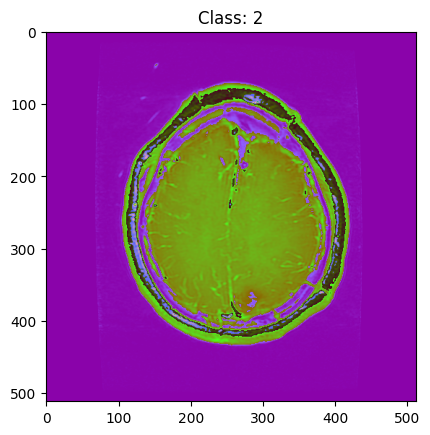

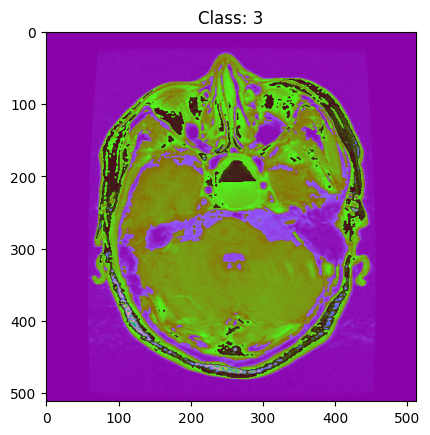

In [ ]:


# Define the paths for the test set
test_path = '/content/drive/MyDrive/CSE413-LAB Project/output/test'

test_dataset = datasets.ImageFolder(root=test_path, transform=transform)


unique_classes = set(test_dataset.targets)


test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)


for class_label in unique_classes:
    # Find an image with the specified class label
    for images, labels in test_loader:
        if labels.item() == class_label:
            img = transforms.ToPILImage()(images[0])
            plt.imshow(img)
            plt.title(f"Class: {test_dataset.classes[class_label]}")
            plt.show()
            break

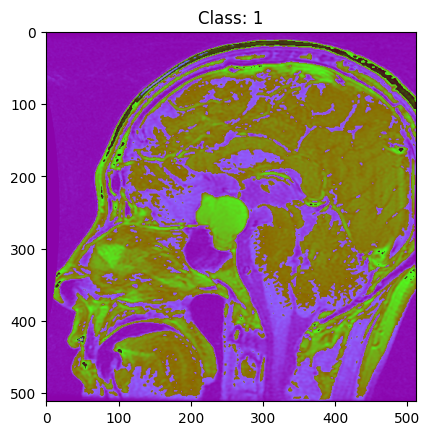

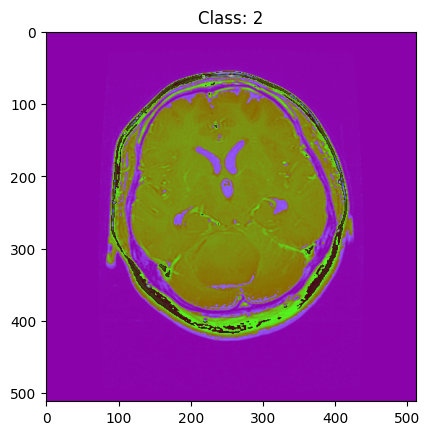

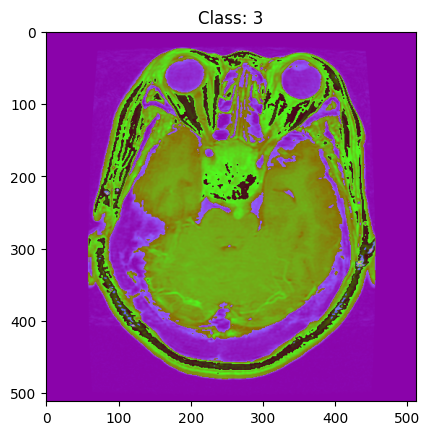

In [ ]:

# Define the paths for the val set
val_path = '/content/drive/MyDrive/CSE413-LAB Project/output/val'
val_dataset = datasets.ImageFolder(root=val_path, transform=transform)


unique_classes = set(val_dataset.targets)


val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True)

# Display one image from each class in the val set
for class_label in unique_classes:

    for images, labels in val_loader:
        if labels.item() == class_label:
            img = transforms.ToPILImage()(images[0])
            plt.imshow(img)
            plt.title(f"Class: {val_dataset.classes[class_label]}")
            plt.show()
            break

# ResNet50 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CSE413-LAB Project/output/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/CSE413-LAB Project/output/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/CSE413-LAB Project/output/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 2147 images belonging to 3 classes.
Found 305 images belonging to 3 classes.
Found 615 images belonging to 3 classes.


In [ ]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

In [ ]:
ResNet50.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  ResNet50,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 126875523 (483.99 MB)
Trainable params: 10

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
68/68 [==============================] - 809s 12s/step - loss: 2.6025 - accuracy: 0.3987 - val_loss: 1.2867 - val_accuracy: 0.2295
Epoch 2/10
68/68 [==============================] - 714s 10s/step - loss: 1.1304 - accuracy: 0.4308 - val_loss: 1.0257 - val_accuracy: 0.6623
Epoch 3/10
68/68 [==============================] - 710s 10s/step - loss: 1.1091 - accuracy: 0.4406 - val_loss: 0.9985 - val_accuracy: 0.4656
Epoch 4/10
68/68 [==============================] - 717s 11s/step - loss: 1.0539 - accuracy: 0.4830 - val_loss: 0.9622 - val_accuracy: 0.6852
Epoch 5/10
68/68 [==============================] - 714s 10s/step - loss: 1.0624 - accuracy: 0.4616 - val_loss: 0.9688 - val_accuracy: 0.4656
Epoch 6/10
68/68 [==============================] - 708s 10s/step - loss: 1.0394 - accuracy: 0.4905 - val_loss: 0.9450 - val_accuracy: 0.5115
Epoch 7/10
68/68 [==============================] - 718s 11s/step - loss: 1.0176 - accuracy: 0.5156 - val_loss: 0.9503 - val_accuracy: 0.5869
Epoch 

Accuracy Matrix

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 137s 7s/step - loss: 0.9584 - accuracy: 0.5154
Accuracy: 0.5154471397399902
Loss: 0.9584017395973206


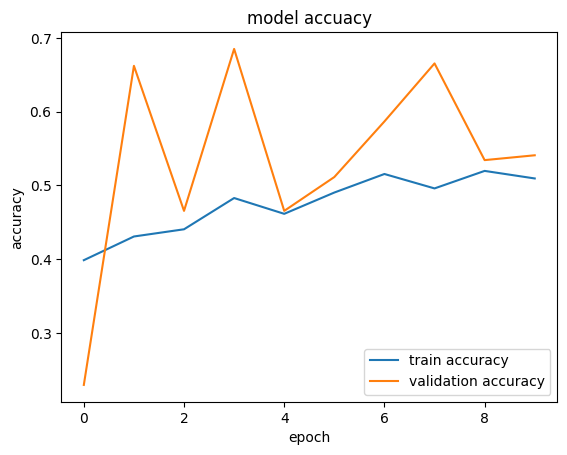

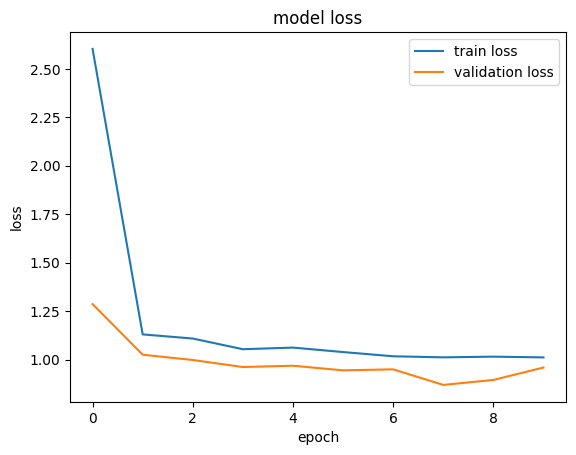

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

## VGG16

In [ ]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40932163 (156.14 MB)
Trainable params: 2

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 15
)

Epoch 1/15
68/68 [==============================] - 74s 1s/step - loss: 1.3277 - accuracy: 0.6027 - val_loss: 0.5000 - val_accuracy: 0.8230
Epoch 2/15
68/68 [==============================] - 67s 985ms/step - loss: 0.6301 - accuracy: 0.7327 - val_loss: 0.4452 - val_accuracy: 0.8262
Epoch 3/15
68/68 [==============================] - 65s 951ms/step - loss: 0.5603 - accuracy: 0.7550 - val_loss: 0.3565 - val_accuracy: 0.8689
Epoch 4/15
68/68 [==============================] - 65s 959ms/step - loss: 0.5471 - accuracy: 0.7690 - val_loss: 0.3797 - val_accuracy: 0.8393
Epoch 5/15
68/68 [==============================] - 70s 1s/step - loss: 0.4732 - accuracy: 0.8076 - val_loss: 0.3541 - val_accuracy: 0.8459
Epoch 6/15
68/68 [==============================] - 65s 954ms/step - loss: 0.4953 - accuracy: 0.7890 - val_loss: 0.3552 - val_accuracy: 0.8623
Epoch 7/15
68/68 [==============================] - 65s 963ms/step - loss: 0.4513 - accuracy: 0.8104 - val_loss: 0.3742 - val_accuracy: 0.8459
Epoch

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 12s 579ms/step - loss: 0.3991 - accuracy: 0.8374
Accuracy: 0.8373983502388
Loss: 0.3990982472896576


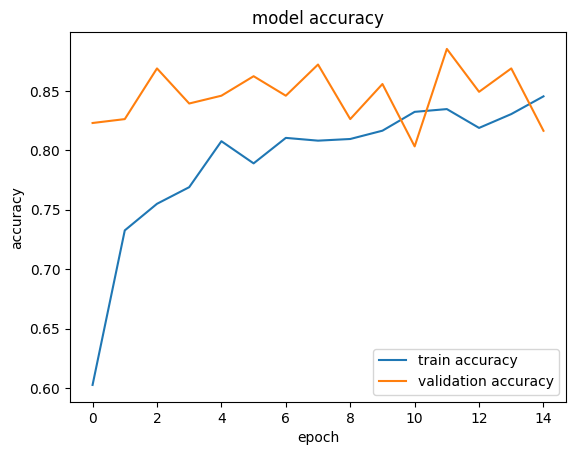

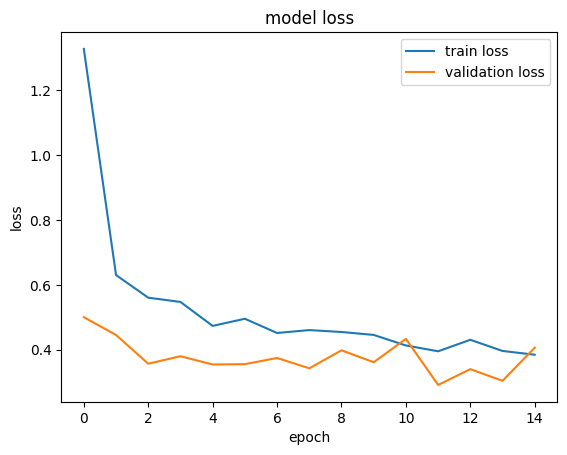

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# MobileNet 

In [ ]:
MobileNetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
MobileNetv2.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  MobileNetv2,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_2 (Dropout)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              64226304  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 3)                 1539      
                                                      

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
68/68 [==============================] - 74s 1s/step - loss: 2.8465 - accuracy: 0.7056 - val_loss: 1.0234 - val_accuracy: 0.7836
Epoch 2/10
68/68 [==============================] - 64s 947ms/step - loss: 0.5271 - accuracy: 0.8235 - val_loss: 0.5450 - val_accuracy: 0.8131
Epoch 3/10
68/68 [==============================] - 65s 957ms/step - loss: 0.3459 - accuracy: 0.8635 - val_loss: 0.3505 - val_accuracy: 0.8623
Epoch 4/10
68/68 [==============================] - 65s 954ms/step - loss: 0.3390 - accuracy: 0.8724 - val_loss: 0.3676 - val_accuracy: 0.8328
Epoch 5/10
68/68 [==============================] - 68s 1s/step - loss: 0.3299 - accuracy: 0.8747 - val_loss: 0.4078 - val_accuracy: 0.8492
Epoch 6/10
68/68 [==============================] - 64s 950ms/step - loss: 0.3180 - accuracy: 0.8803 - val_loss: 0.3902 - val_accuracy: 0.8295
Epoch 7/10
68/68 [==============================] - 64s 938ms/step - loss: 0.2888 - accuracy: 0.8938 - val_loss: 0.5104 - val_accuracy: 0.8393
Epoch

Accuracy Matrics

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 10s 523ms/step - loss: 0.3250 - accuracy: 0.8846
Accuracy: 0.8845528364181519
Loss: 0.32501721382141113


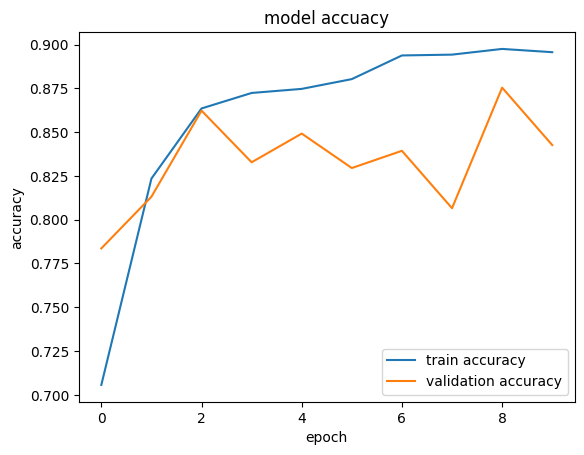

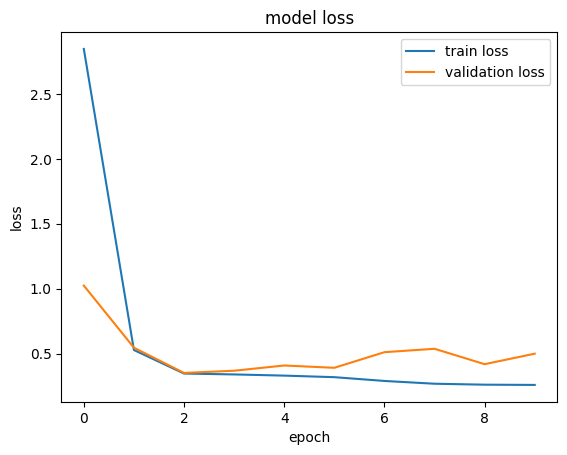

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# #Densenet121

In [ ]:
densenet121 = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
)


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet121.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  densenet121,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dropout_3 (Dropout)         (None, 50176)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)              51381248  
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 58945091 (224.86 MB)
Trainable params: 5

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 5
)

Epoch 1/5
68/68 [==============================] - 91s 1s/step - loss: 3.4251 - accuracy: 0.6521 - val_loss: 0.4560 - val_accuracy: 0.8295
Epoch 2/5
68/68 [==============================] - 67s 1s/step - loss: 0.4937 - accuracy: 0.8020 - val_loss: 0.3417 - val_accuracy: 0.8721
Epoch 3/5
68/68 [==============================] - 67s 990ms/step - loss: 0.4709 - accuracy: 0.8076 - val_loss: 0.4200 - val_accuracy: 0.8361
Epoch 4/5
68/68 [==============================] - 67s 992ms/step - loss: 0.3727 - accuracy: 0.8482 - val_loss: 0.3306 - val_accuracy: 0.8754
Epoch 5/5
68/68 [==============================] - 67s 982ms/step - loss: 0.3964 - accuracy: 0.8412 - val_loss: 0.3894 - val_accuracy: 0.8787


In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 13s 602ms/step - loss: 0.2865 - accuracy: 0.8862
Accuracy: 0.8861788511276245
Loss: 0.286476194858551


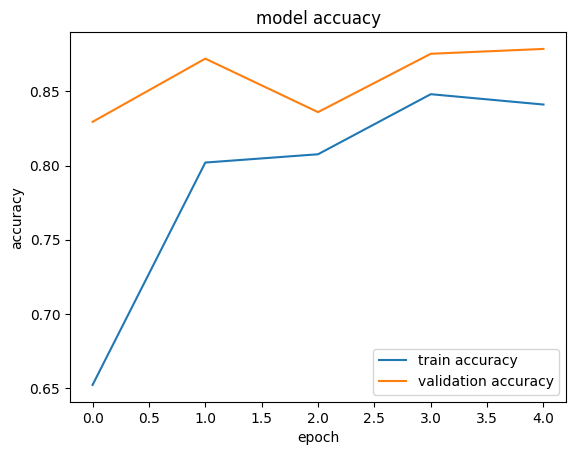

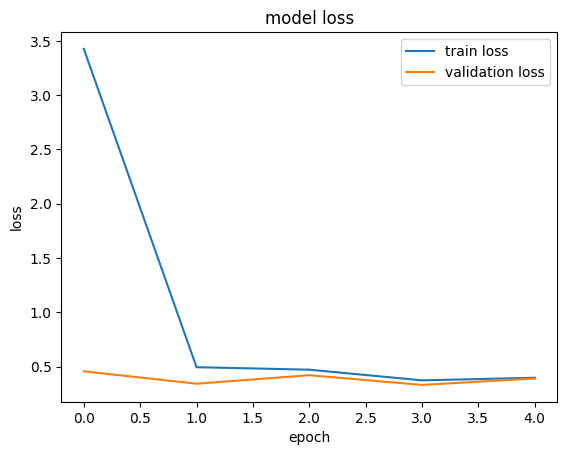

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# EfficientNet 

In [ ]:
efficientnetb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
efficientnetb0.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  efficientnetb0,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_4 (Dropout)         (None, 62720)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              64226304  
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 3)                 1539      
                                                      

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 5
)

Epoch 1/5
68/68 [==============================] - 78s 1s/step - loss: 4.9009 - accuracy: 0.3675 - val_loss: 1.1628 - val_accuracy: 0.4656
Epoch 2/5
68/68 [==============================] - 73s 1s/step - loss: 1.1288 - accuracy: 0.3987 - val_loss: 1.1088 - val_accuracy: 0.4656
Epoch 3/5
68/68 [==============================] - 64s 958ms/step - loss: 1.1019 - accuracy: 0.4159 - val_loss: 1.0819 - val_accuracy: 0.4656
Epoch 4/5
68/68 [==============================] - 81s 1s/step - loss: 1.0921 - accuracy: 0.4224 - val_loss: 1.1356 - val_accuracy: 0.4656
Epoch 5/5
68/68 [==============================] - 78s 1s/step - loss: 1.0839 - accuracy: 0.4481 - val_loss: 1.0607 - val_accuracy: 0.4656


In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 11s 546ms/step - loss: 1.0622 - accuracy: 0.4650
Accuracy: 0.4650406539440155
Loss: 1.0621956586837769


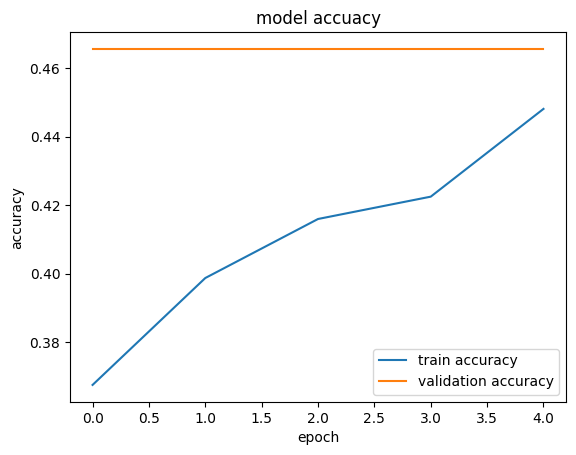

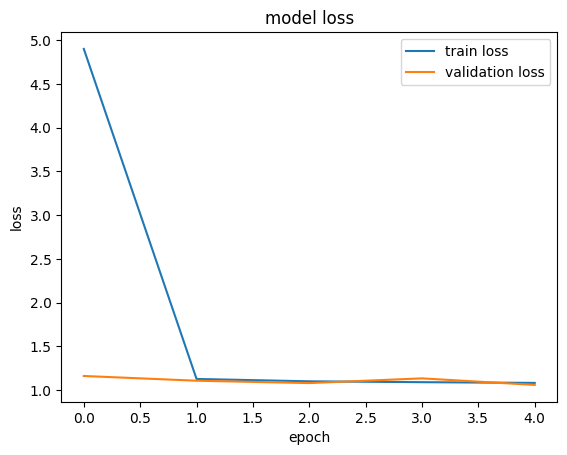

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# InceptionV3

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3

# Create the InceptionV3 base model
inceptionv3 = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
inceptionv3.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  inceptionv3,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_5 (Dropout)         (None, 51200)             0         
                                                                 
 dense_15 (Dense)            (None, 1024)              52429824  
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 74758947 (285.18 MB)
Trainable params: 5

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 5
)

Epoch 1/5
68/68 [==============================] - 77s 1s/step - loss: 3.6088 - accuracy: 0.6414 - val_loss: 0.4834 - val_accuracy: 0.8197
Epoch 2/5
68/68 [==============================] - 66s 975ms/step - loss: 0.4932 - accuracy: 0.8016 - val_loss: 0.4681 - val_accuracy: 0.7934
Epoch 3/5
68/68 [==============================] - 66s 966ms/step - loss: 0.4823 - accuracy: 0.8039 - val_loss: 0.4336 - val_accuracy: 0.8262
Epoch 4/5
68/68 [==============================] - 66s 969ms/step - loss: 0.4670 - accuracy: 0.8090 - val_loss: 0.4214 - val_accuracy: 0.8262
Epoch 5/5
68/68 [==============================] - 65s 950ms/step - loss: 0.4019 - accuracy: 0.8347 - val_loss: 0.5251 - val_accuracy: 0.8066


Accuracy Matrics

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 12s 611ms/step - loss: 0.4167 - accuracy: 0.8374
Accuracy: 0.8373983502388
Loss: 0.41665270924568176


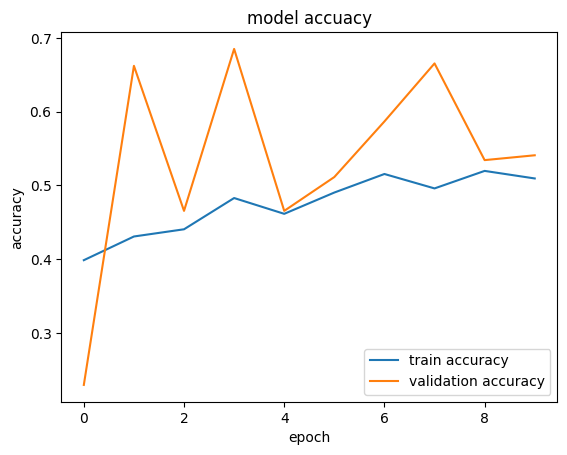

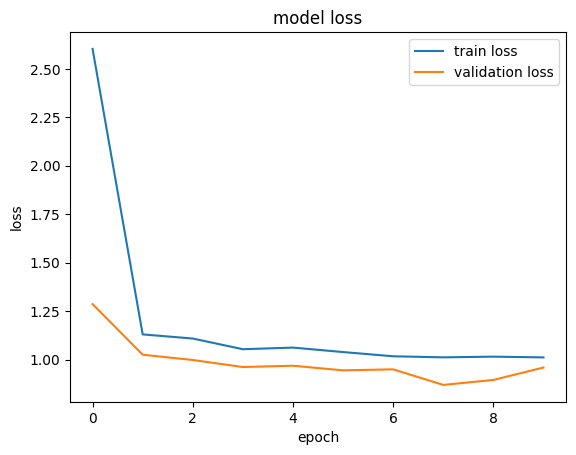

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# Thank you